In [2]:
#과잉 적합 방지 전략: 오버피팅
import numpy as np
X = np.array([['Korea', 44, 7200],
             ['Japan', 27, 4800],
             ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])

print(X)

[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [3]:
import numpy as np
X = np.array([['Korea', 44, 7200],
             ['Japan', 27, 4800],
             ['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

XX = onehotencoder.fit_transform(X[:, 0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)
X = np.concatenate((XX, X), axis=1)
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


In [4]:
#과잉 적합 방지 전략

# 1) 조기 종료: 에러 값이 감소함 → 검증 데이터 값이 증가함 | 훈련용, 검증용, test용 데이터
# 2) 가중치 규제 방법(regularization): 가중치 값 큼 → 과잉 적합 발생(Loss 값) → w값을 줄이면 loss 값 감소
# 3) 데이터 증강 방법
# 4) 드롭아웃 방법

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#loss function 계산
#오버 피팅 덜 발생

In [26]:
#드롭 아웃: 학습 과정에서 랜덤하게 제외 → 0으로 간주 → 변수 줄어듦 → 3 * 4 + 4 * 2 = 20 → 3 * 2 + 2 * 2 = 10

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dropout(0.5)) #50% → 8개
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #8개
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
#데이터 증강: 소량의 데이터에서 많은 훈련 데이터 추출 ex) 고양이 사진 → 오버 피팅 방지
#오버 피팅(과잉 적합) 방지 전략 → 4가지 방법
# 1) 조기 종료
# 2) 가중치 규제 방법
# 3) 데이터 증강 방법
# 4) 드롭아웃 방법

#regularization → 50%

#앙상블 → 픽셀(28 * 28 = 784) → 투표 → 출력: 동일한 신경망을 N개 생성

In [27]:
#MNIST 필기체 숫자 인식
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28 * 28 = 784
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2175 - accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0980 - accuracy: 0.9694
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0681 - accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0654 - accuracy: 0.9790


[0.06541600823402405, 0.9789999723434448]

4422102/4422102 [==============================] - 1s 0us/step


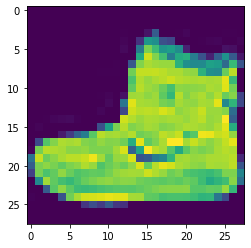

In [31]:
#데이터셋: 28 * 28 = 0 ~ 255

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5030 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3786 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3394 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3150 - accuracy: 0.8857
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3720 - accuracy: 0.8687
정확도: 0.8687000274658203


In [35]:
#타이타닉 생존자 예측
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [45]:
# 데이터 세트를 읽어들인다. 
train = pd.read_csv("D:\CSV/titanic/train.csv", sep=',')
test = pd.read_csv("D:\CSV/titanic/test.csv", sep=',')

# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)

In [46]:
df = train.groupby('Sex').mean()["Survived"]

<AxesSubplot:xlabel='Sex'>

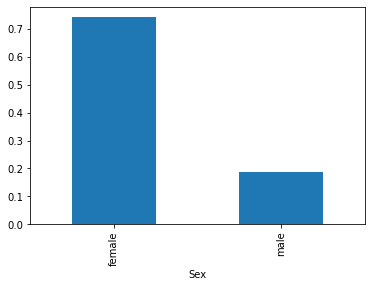

In [47]:
df.plot(kind='bar')

In [48]:
plt.show() #시각화

In [53]:
train.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [55]:
# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 

# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)

Epoch 1/30
891/891 [==============================] - 2s 2ms/step - loss: 0.6131 - accuracy: 0.6308
Epoch 2/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.7542
Epoch 3/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5124 - accuracy: 0.7811
Epoch 4/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4988 - accuracy: 0.7845
Epoch 5/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4881 - accuracy: 0.7901
Epoch 6/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.7879
Epoch 7/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.7868
Epoch 8/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4774 - accuracy: 0.7868
Epoch 9/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.7924
Epoch 10/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4728 - accuracy: 0.7868

In [ ]:
#9장. 컨벌루션 신경망
#2차원 형태의 입력 처리 → 이미지 처리
#CNN: 입력층, 풀링 연산 적용 → regression, classfication